In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("Different_stores_dataset (1).csv")
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


In [40]:
df.shape

(99457, 13)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


### 1. Check missing values and duplicate records

In [42]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64


In [43]:
duplicates = df.duplicated().sum()
print("Duplicate records:", duplicates)

Duplicate records: 0


### 2. Add column name 'Total Sales'

In [44]:
df["Total Sales"]= df['quantity'] * df['selling_price_per_unit']
df.head(1)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.4,1425.38,Credit Card,South,Kentucky,Kanyon,7502.0


### 3. How many customers have age more than 60?

In [45]:
Customer_over_60 = df[df["age"]>60]
Total_Customer_over_60 = Customer_over_60.shape[0]
Total_Customer_over_60

17169

### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [46]:
unique_customers = df['customer_id'].nunique()
print(" unique customers IDs:", {unique_customers})

multiple_purchases = df['customer_id'].value_counts()
customers_with_multiple_purchases= multiple_purchases[multiple_purchases >1]
Total_customers_with_multiple_purchases = customers_with_multiple_purchases.shape[0]
print("Customers with multiple purchases:",Total_customers_with_multiple_purchases )

 unique customers IDs: {99457}
Customers with multiple purchases: 0


### 5. Are there more male or female customers, Show in Pie Chart?

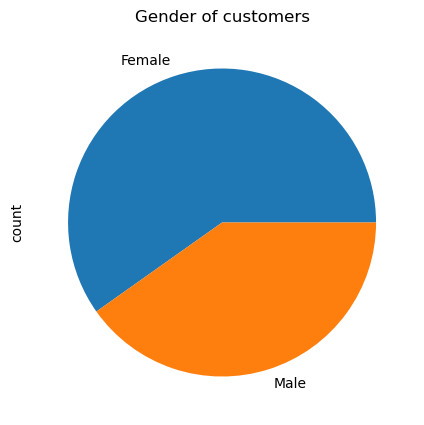

In [58]:
df.gender.value_counts().plot(kind="pie", figsize=(12,5))
plt.title("Gender of customers")
plt.show()

### 6. Which category is least popular among customers?

In [61]:
least_popular_category = df['category'].value_counts().idxmin()

print("The least popular category:", least_popular_category)


The least popular category among customers is: Books


### 7. Which category has the highest sales volume?

In [62]:
highest_sales_category = df['category'].value_counts().idxmax()

print("The highest popular category:", highest_sales_category)

The highest popular category: Clothing


### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [83]:
df['Total Profit'] = df['Total Sales'] - df['cost_price_per_unit'] * df['quantity']
df.head(1)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit,Profit Margin
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.4,1425.38,Credit Card,South,Kentucky,Kanyon,7502.0,375.1,405.0


### 9. Display the top 10 invoices with the highest quantities sold?

In [77]:
top_10_invoices = df.nlargest(10, 'quantity')
top_10_invoices

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total Profit,Profit Margin
100,I283443,10/30/2016 10:21,C189493,Male,43,Technology,15,3150.00,2677.500,Credit Card,Central,Illinois,Viaport Outlet,47250.00,668587.500,15.000000
109,I293215,10/30/2016 10:23,C166635,Male,18,Cosmetics,12,162.64,130.112,Credit Card,Central,Illinois,Istinye Park,1951.68,21858.816,20.000000
275,I282789,10/30/2016 11:02,C172185,Female,67,Cosmetics,12,81.32,76.924,Cash,West,Idaho,Istinye Park,975.84,10786.992,5.405804
305,I115679,10/30/2016 11:09,C266462,Male,27,Clothing,11,300.08,285.060,Cash,Central,Michigan,Kanyon,3300.88,33174.020,5.005332
61,I207205,10/30/2016 10:12,C716161,Female,33,Clothing,10,300.08,225.060,Debit Card,East,New York,Kanyon,3000.80,27757.400,25.000000
129,I160221,10/30/2016 10:28,C319231,Male,25,Clothing,10,900.24,675.180,Cash,West,Oregon,Mall of Istanbul,9002.40,83272.200,25.000000
224,I353272,10/30/2016 10:50,C199311,Female,34,Clothing,10,300.08,292.060,Credit Card,East,Ohio,Istinye Park,3000.80,27087.400,2.672621
201,I286193,10/30/2016 10:45,C322994,Male,37,Cosmetics,9,121.98,118.485,Cash,West,Colorado,Istinye Park,1097.82,8814.015,2.865224
11,I139207,10/30/2016 10:00,C191708,Female,29,Books,8,15.15,15.105,Credit Card,West,Idaho,Zorlu Center,121.20,848.760,0.297030
145,I246375,10/30/2016 10:32,C236365,Female,67,Cosmetics,8,81.32,56.924,Cash,West,Oregon,Kanyon,650.56,4749.088,30.000000


### 10. Which payment method is most commonly used?

In [78]:
Most_used_Payment_method = df["payment_method"].value_counts().idxmax()
print("Most used Payment method : ", Most_used_Payment_method)

Most used Payment method :  Cash


### 11. Total Sales with respect to region?

In [79]:
total_sales_by_region = df.groupby('region')['Total Sales'].sum()
total_sales_by_region

region
Central    58803471.74
East       72280660.57
South      40655491.64
West       79825624.03
Name: Total Sales, dtype: float64

### 12. Sort Malls with average sales higher to lower?

In [80]:
sorted_malls_by_avg_sales = df.groupby('shopping_mall')['Total Sales'].mean().sort_values()
print("Shopping malls sorted by average sales", sorted_malls_by_avg_sales)

Shopping malls sorted by average sales shopping_mall
Metrocity           2485.030133
Metropol AVM        2497.777108
Istinye Park        2523.186677
Viaport Outlet      2523.835118
Mall of Istanbul    2543.276766
Kanyon              2550.618396
Zorlu Center        2573.248351
Name: Total Sales, dtype: float64


### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

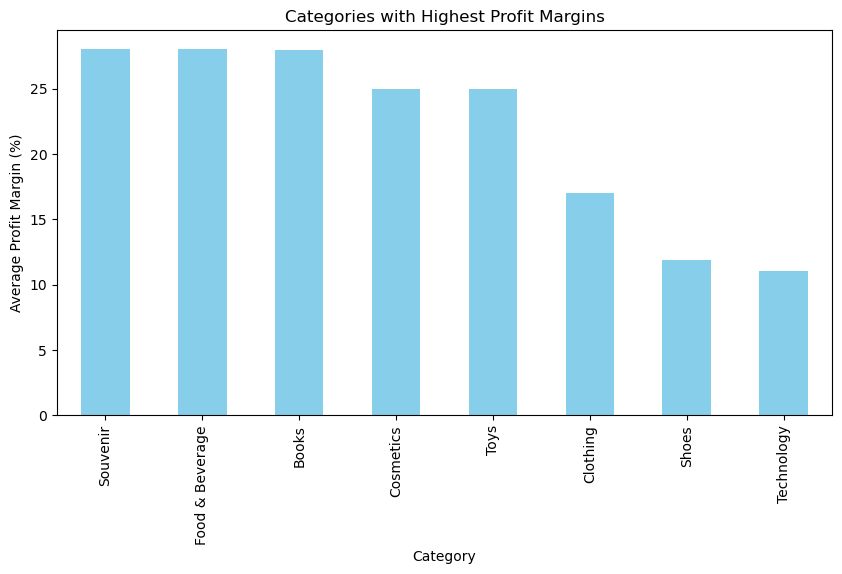

In [86]:
df['Profit Margin'] = (df['Total Profit'] / df['Total Sales']) * 100
avg_profit_margin_by_category = df.groupby('category')['Profit Margin'].mean()
sorted_categories_by_profit_margin = avg_profit_margin_by_category.sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sorted_categories_by_profit_margin.plot(kind='bar', color='skyblue')
plt.title("Categories with Highest Profit Margins")
plt.xlabel("Category")
plt.ylabel("Average Profit Margin (%)")
plt.show()


### 14.  What is the total number of transactions per region for each payment method?

In [87]:
transactions_per_region_payment_method = df.groupby(['region', 'payment_method']).size().unstack(fill_value=0)

print("Total number of transactions per region for each payment method:")
print(transactions_per_region_payment_method)


Total number of transactions per region for each payment method:
payment_method   Cash  Credit Card  Debit Card
region                                        
Central         10319         8140        4640
East            12738         9817        5751
South            7227         5698        3284
West            14163        11276        6404


### 15. How do sales in different categories compare between males and females?

category      Books     Clothing   Cosmetics  Food & Beverage        Shoes  \
gender                                                                       
Female    489420.75  68260097.84  4068073.66        505322.60  39425167.30   
Male      345238.20  45754397.92  2728611.28        344233.37  27128284.17   

category   Souvenir  Technology        Toys  
gender                                       
Female    382867.20  34669950.0  2416046.08  
Male      252957.45  23230200.0  1564380.16  


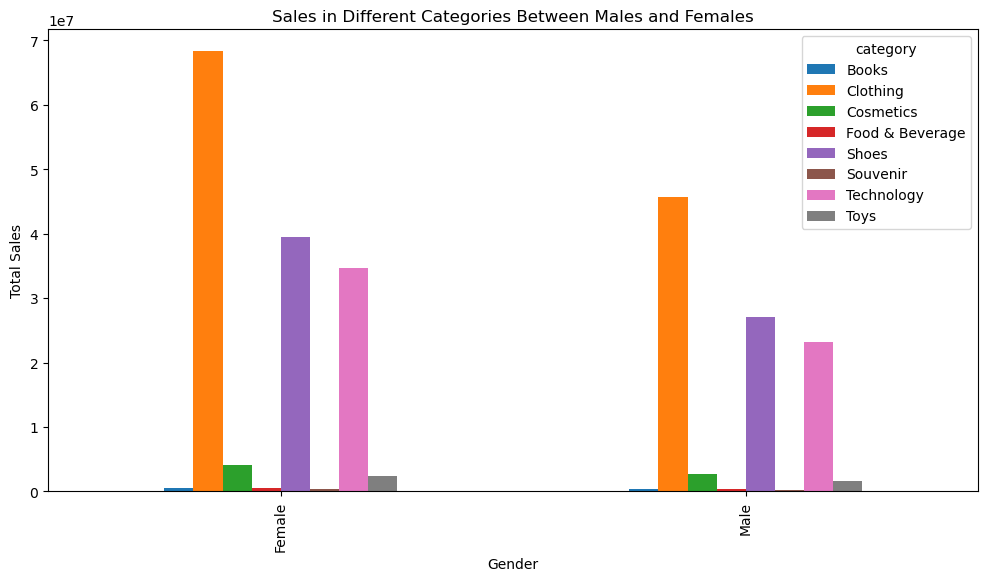

In [90]:
sales_by_gender_category = df.groupby(['gender', 'category'])['Total Sales'].sum().unstack()
print(sales_by_gender_category)

sales_by_gender_category.plot(kind='bar', figsize=(12, 6))
plt.title("Sales in Different Categories Between Males and Females")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.show()
